# Loading the folder


In [1]:
#### Load the main folder into colab
#import data from drive

from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'darshanzala/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


Import all the necessary libraries

In [19]:
### import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [3]:
### Read the data
df = pd.read_excel("/content/drive/MyDrive/darshanzala/predictiondata.xlsx")

In [6]:
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,0.024245,199402.827298,263.223657,2553.320334,0.990780,7942.735376,0.034264,45.441783
std,0.023942,32753.247882,330.161563,437.069060,0.214334,3226.687137,0.044597,5.758210
min,0.000000,161074.000000,14.143000,2018.000000,0.660000,3314.000000,0.000900,36.110000
25%,0.005000,167072.000000,58.785500,2117.000000,0.860000,5230.000000,0.009850,37.960000
50%,0.014000,198786.000000,114.857000,2590.000000,0.930000,7281.000000,0.018000,47.220000
75%,0.046000,215807.500000,378.571500,2980.500000,1.140000,9450.500000,0.044300,47.685000
max,0.104000,254777.000000,2011.143000,3142.000000,1.430000,17906.000000,0.245700,56.480000


# Preprocessing the Data

In [9]:
### Preprocess the data splitting the train and test dataset in 80:20 ratio

def create_lagged_features(X, lag):
    for i in range(lag):
        X[f"lag_{i+1}"] = X['y'].shift(i+1)
    X.dropna(inplace=True)
    return X

def test_train_split(df):
  split_index = int(len(df)*0.8)
  df_train = df[:split_index]
  df_test = df[split_index:]
  return df_train , df_test


df = create_lagged_features(df,7)

df_train , df_test = test_train_split(df)




# X_train = create_lagged_features(df["y"], 7).dropna()
# y_train = df_train["y"].iloc[7:]
# X_test = create_lagged_features(df_test["y"], 7).dropna()
# y_test = df_test["y"].iloc[7:]

# # # Extract the features and target variable from the data
# X_train = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
# y_train = df_train['y']

# X_test = df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
# y_test = df_test['y']


In [18]:
x_train , y_train = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7' , 'lag_1' , 'lag_2' , 'lag_3' , 'lag_4' , 'lag_5' , 'lag_6' , 'lag_7']].values  , df_train['y'].values
x_test , y_test = df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7' , 'lag_1' , 'lag_2' , 'lag_3' , 'lag_4' , 'lag_5' , 'lag_6' , 'lag_7']].values  , df_test['y'].values


In [24]:
def train_model(model , x_train , y_train , x_test , y_test):
  train_error , val_error = [] , []
  for m in range(1, len(x_train)):
    model.fit(x_train[:m] , y_train[:m])
    y_train_pred = model.predict(x_train[:m])
    y_val_pred = model.predict(x_test)

    train_error.append(mean_squared_error(y_train[:m] , y_train_pred))
    val_error.append(mean_squared_error(y_test , y_val_pred))

  plt.plot(np.sqrt(train_error), "r-+", label="Training Set")
  plt.plot(np.sqrt(val_error), "b-", label="Validation Set")
  plt.title("Learning Curves")
  plt.xlabel("Training Set Size")
  plt.ylabel("RMSE")
  plt.legend()
  plt.show()
  print("MSE:", mean_squared_error(y_test, y_val_pred))


# Linear Regression


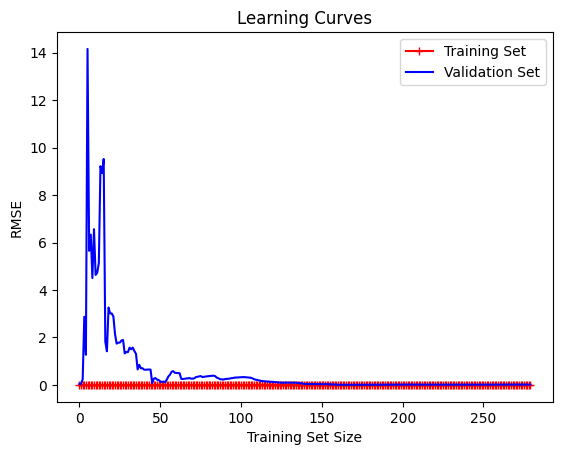

MSE: 0.00021128449863392048


In [25]:
# Create a Linear Regression model
model_lr = LinearRegression()
train_model(model_lr , x_train , y_train , x_test , y_test )


# Convolutional Neural Network

In [32]:
###using a cnn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (x_train.shape[1], 1)  # Assuming X_train has shape (num_samples, num_features)
X_train_reshaped = np.expand_dims(x_train, axis=-1)  # Add an extra dimension for channels

X_test_reshaped = np.expand_dims(x_test, axis=-1)
print(X_train_reshaped.shape)
# Step 2: Create a CNN model
model_cnn = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Step 3: Compile and train the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.fit(X_train_reshaped, y_train, epochs=25, batch_size=16, verbose=1)

# Step 4: Evaluate the model
mse = model_cnn.evaluate(X_test_reshaped, y_test, verbose=0)
print("Mean Squared Error (MSE):", mse)

(281, 14, 1)
Epoch 1/25
18/18 [==============================] - 2s 4ms/step - loss: 1171898.7500
Epoch 2/25
18/18 [==============================] - 0s 4ms/step - loss: 158065.6250
Epoch 3/25
18/18 [==============================] - 0s 4ms/step - loss: 25407.5605
Epoch 4/25
18/18 [==============================] - 0s 3ms/step - loss: 6048.4146
Epoch 5/25
18/18 [==============================] - 0s 3ms/step - loss: 2325.4363
Epoch 6/25
18/18 [==============================] - 0s 4ms/step - loss: 546.6599
Epoch 7/25
18/18 [==============================] - 0s 3ms/step - loss: 516.3353
Epoch 8/25
18/18 [==============================] - 0s 3ms/step - loss: 448.7952
Epoch 9/25
18/18 [==============================] - 0s 4ms/step - loss: 385.1410
Epoch 10/25
18/18 [==============================] - 0s 4ms/step - loss: 435.6475
Epoch 11/25
18/18 [==============================] - 0s 4ms/step - loss: 371.3409
Epoch 12/25
18/18 [==============================] - 0s 3ms/step - loss: 297.8353
E

Mean Squared Error (MSE): 264.24420166015625


# Recurrent Neural Network

Mean Squared Error (MSE): 46910.98046875


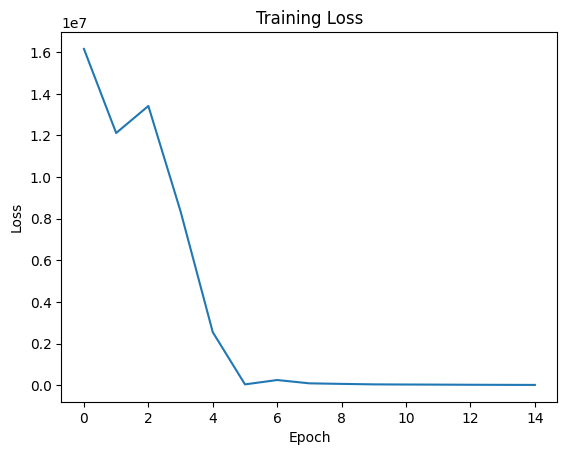

In [38]:
model_rnn = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=input_shape),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Step 3: Compile and train the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
history = model_rnn.fit(X_train_reshaped, y_train, epochs=15, batch_size=32, verbose=0)

# Step 4: Evaluate the model
mse_rnn = model_rnn.evaluate(X_test_reshaped, y_test, verbose=0)
print("Mean Squared Error (MSE):", mse_rnn)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# ARIMA Model on individual feature

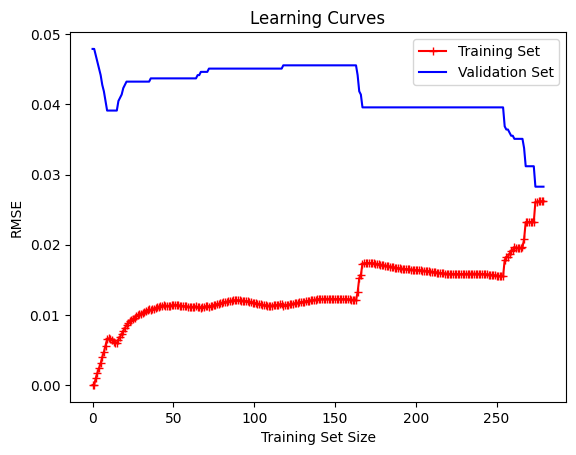

MSE: 0.0007990704225352116


In [43]:
#Support Vector Regression (SVR)
svr_model = SVR()
train_model(svr_model, x_train, y_train, x_test, y_test)


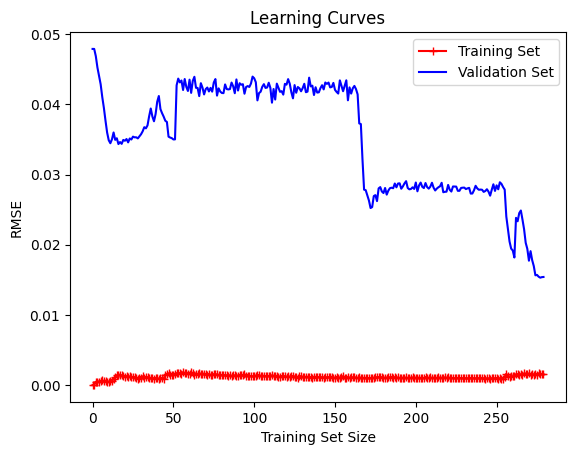

MSE: 0.00023691941971830955


In [45]:
#Random Forest
rf_model = RandomForestRegressor()
train_model(rf_model, x_train, y_train, x_test, y_test)

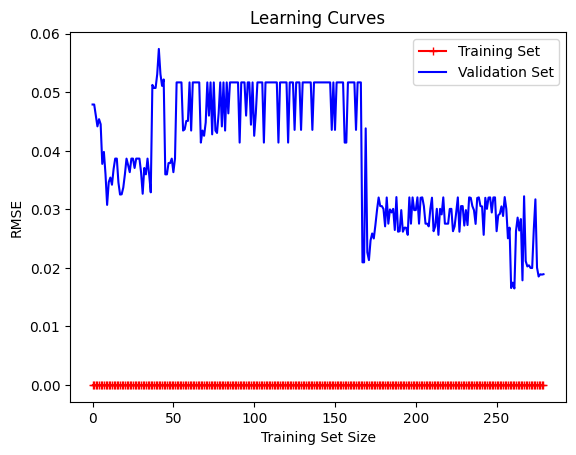

MSE: 0.00035774647887323955


In [46]:
#DecisionTree
dt_model=DecisionTreeRegressor()
train_model(dt_model, x_train, y_train, x_test, y_test)

# XGB

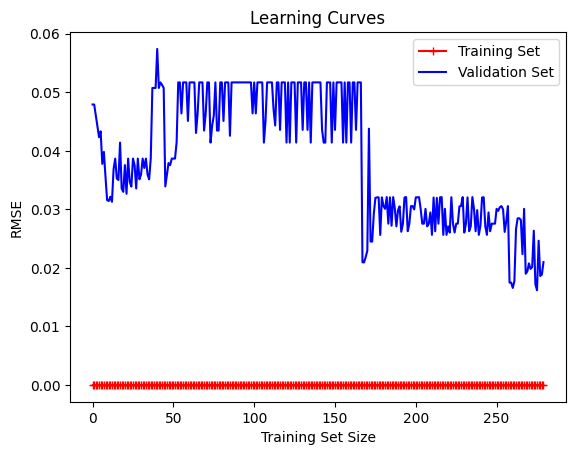

MSE: 0.0004403380281690142


In [48]:
import xgboost as xgb

model = xgb.XGBRegressor(
    n_estimators=100,  # Number of trees (boosting rounds)
    max_depth=5,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate (shrinkage factor)
    objective='reg:squarederror'  # Objective function for regression
)

train_model(dt_model, x_train, y_train, x_test, y_test)

# Support Vector Machine

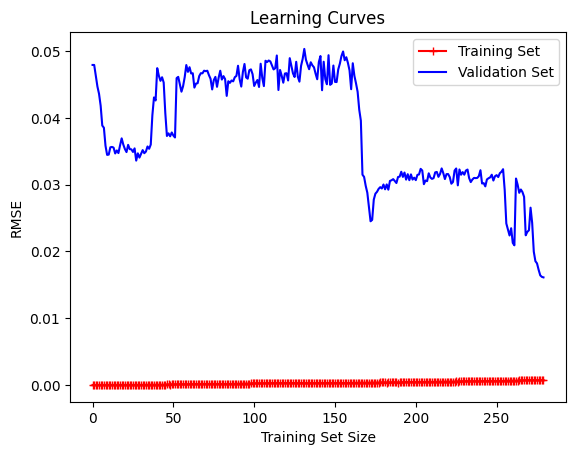

MSE: 0.0002593147377622866


In [49]:
#gradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()
train_model(gb_model,x_train, y_train, x_test, y_test)
